### Visualizando data en Python
#### Tablas, Histogramas, Boxplots, y Slicing para estadistica

Cuando trabajamos con un nuevo dataset, una de las cosas mas utiles de hacer es empezar visualizando la data. Usando tablas, histogramas, box plots y otras herramientas de visualizacion, nos podemos dar una buena idea de que es lo que la data nos esta tratando de decir, y podemos encontrar insights sobre la data que de otra forma no hubieramos descubierto.

Vamos a realizar visualizaciones basicas en Python, y mas importante, vamos a aprendar a empezar a explorar la data desde una perspectiva grafica.

In [1]:
# We first need to import the packages that we will be using
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

# Load in the data set
tips_data = sns.load_dataset("tips")

#### Visualizando la data - tablas

Cuando empiecen a trabajar con un nuevo data set, casi siempre lo mejor es imprimir (print) las primeras filas antes de empezar otro analisis. Esto nos va a enseniar que tipo de data hay en el dataset, que otros tipos de data tenemos para trabajar, y nos va a servir como referencia para los otros plots que vamos a crear.

In [7]:
tips_data.time.value_counts(normalize=True)

Dinner    72.131148
Lunch     27.868852
Name: time, dtype: float64

In [2]:
# Print out the first few rows of the data
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Describiendo la data

Summary statistics, los cuales incluyen cosas como la media, min y max de la data pueden ser utiles para agarrar una intuicion de que tan grandes son algunas de las variabls y cuales podrian ser las variables mas importantes.

In [3]:
# Print out the summary statistics for the quantitative variables
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Creando un Histograma

Despues de tener una "intuicion" inicial sobre la data, es a menudo bueno ver la forma de la distribucion de la data.

In [27]:
sns.set_style("darkgrid")

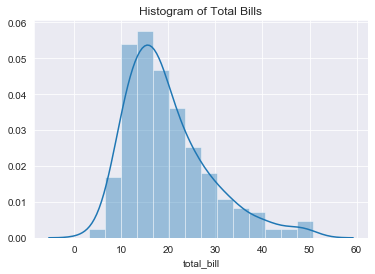

In [16]:
# Plot a histogram of the total bill
(sns.distplot(tips_data["total_bill"], kde=True)
 .set_title("Histogram of Total Bills"))
plt.show()

In [29]:
import altair as at

In [32]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
q1 = tips_data.tip.describe()["25%"]
q3 = tips_data.tip.describe()["75%"]

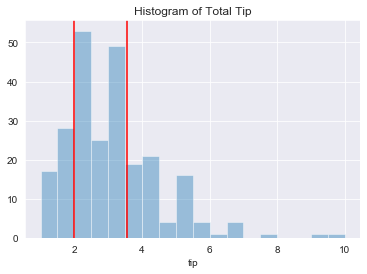

In [24]:
# Plot a histogram of the Tips only
sns.distplot(tips_data["tip"], kde = False).set_title("Histogram of Total Tip")
plt.axvline(q1, color="red")
plt.axvline(q3, color="red")
plt.show()

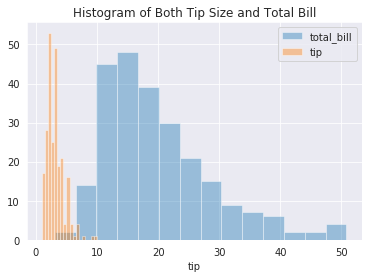

In [15]:
# Plot a histogram of both the total bill and the tips'
sns.distplot(tips_data["total_bill"], 
             kde = False, label="total_bill")
sns.distplot(tips_data["tip"], 
             kde = False, 
             label="tip").set_title("Histogram of Both Tip Size and Total Bill")
plt.legend()
plt.show()

#### Creando un Boxplot

Los boxplots no nos demuestran la forma de una distribucion, pero nos pueden dar una mejor idea sobre el centro y la dispercion al igual que potenciales datos atipicos que puedan existir. Los boxplots y los histogramas se complementan y ayudan a un analista a obtener mas informacion sobre la data.

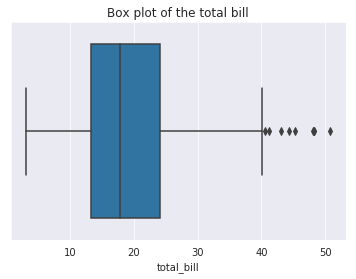

In [17]:
# Create a boxplot of the total bill amounts
sns.boxplot(tips_data["total_bill"]).set_title("Box plot of the total bill")
plt.show()

In [19]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


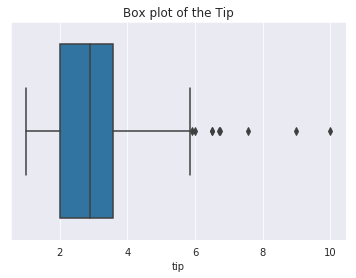

In [23]:
# Create a boxplot of the tips amounts
sns.boxplot(tips_data["tip"]).set_title("Box plot of the Tip")

plt.show()

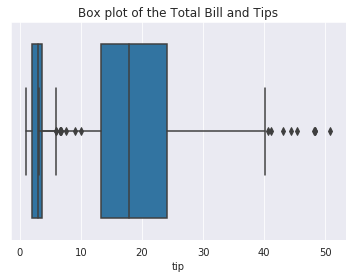

In [24]:
# Create a boxplot of the tips and total bill amounts - do not do it like this
sns.boxplot(tips_data["total_bill"])
sns.boxplot(tips_data["tip"]).set_title("Box plot of the Total Bill and Tips")
plt.show()

#### Creando histogramas y boxplots por grupos

Mientras que ver una variable a la vez es interesante, a veces es mas util ver como cambia una variable en relacion a otra. Usando graficas podemos ver si hay una diferencia entre la cantidad de propina que dan los fumadores vs. los no fumadores, si la propina varia de acuerdo a la hora del dia, o podemos explorar otras tendencias.

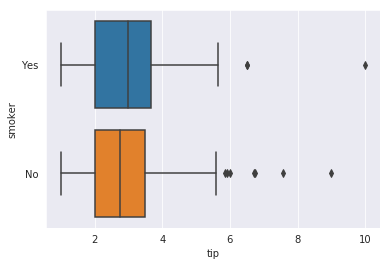

In [26]:
# Create a boxplot and histogram of the tips grouped by smoking status
sns.boxplot(x = tips_data["tip"], y = tips_data["smoker"])
plt.show()

In [25]:
xs = [1,2,3,4]
list(map(lambda x: x*2, xs))

[2, 4, 6, 8]

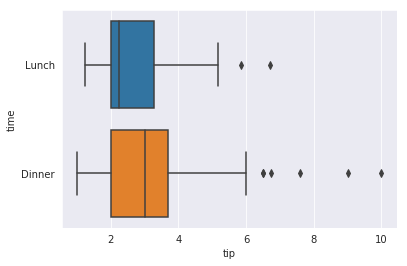

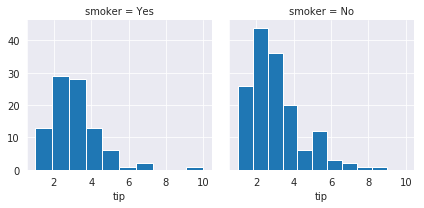

In [30]:
# Create a boxplot and histogram of the tips grouped by time of day
sns.boxplot(x = tips_data["tip"], y = tips_data["time"])

g = sns.FacetGrid(tips_data, col="smoker")
g = g.map(plt.hist, "tip")
plt.show()

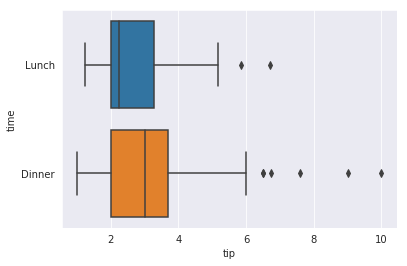

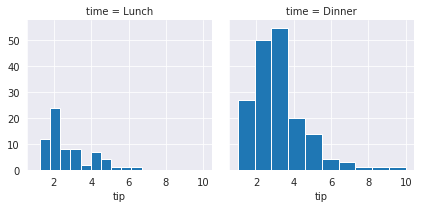

In [33]:
# Create a boxplot and histogram of the tips grouped by the day
sns.boxplot(x = tips_data["tip"], y = tips_data["time"])

g = sns.FacetGrid(tips_data, col="time")
g = g.map(plt.hist, "tip")
plt.show()

In [34]:
tips_data.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

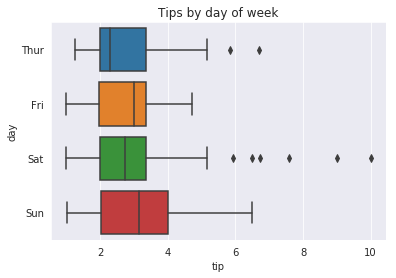

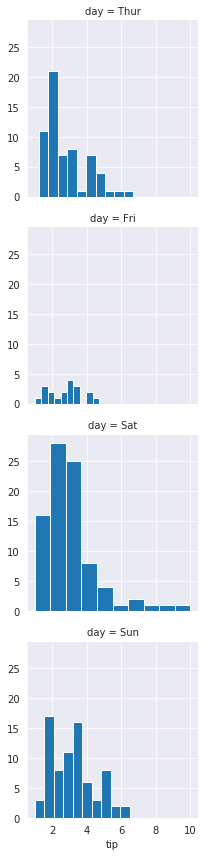

In [35]:
sns.boxplot(x="tip", y="day", data=tips_data).set_title("Tips by day of week")

g = sns.FacetGrid(tips_data, row="day")
g = g.map(plt.hist, "tip")
plt.show()